In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
plt.style.use("fivethirtyeight")
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../Data/GDP.csv")

In [3]:
df = df.sort_values('label', ascending=True)

In [4]:
df['label'] = [f'1/1/{i}' for i in df['label']]

In [5]:
df['label'] = pd.DatetimeIndex(df['label'])

In [6]:
df['label'] = pd.to_datetime(df['label'])

In [80]:
df = df.set_index('label')

KeyError: "None of ['label'] are in the columns"

In [81]:
df.columns

Index(['GDP Per Capita'], dtype='object')

In [8]:
seasonal_decompose = sm.tsa.seasonal_decompose
decomposition = seasonal_decompose(df, model='additive')

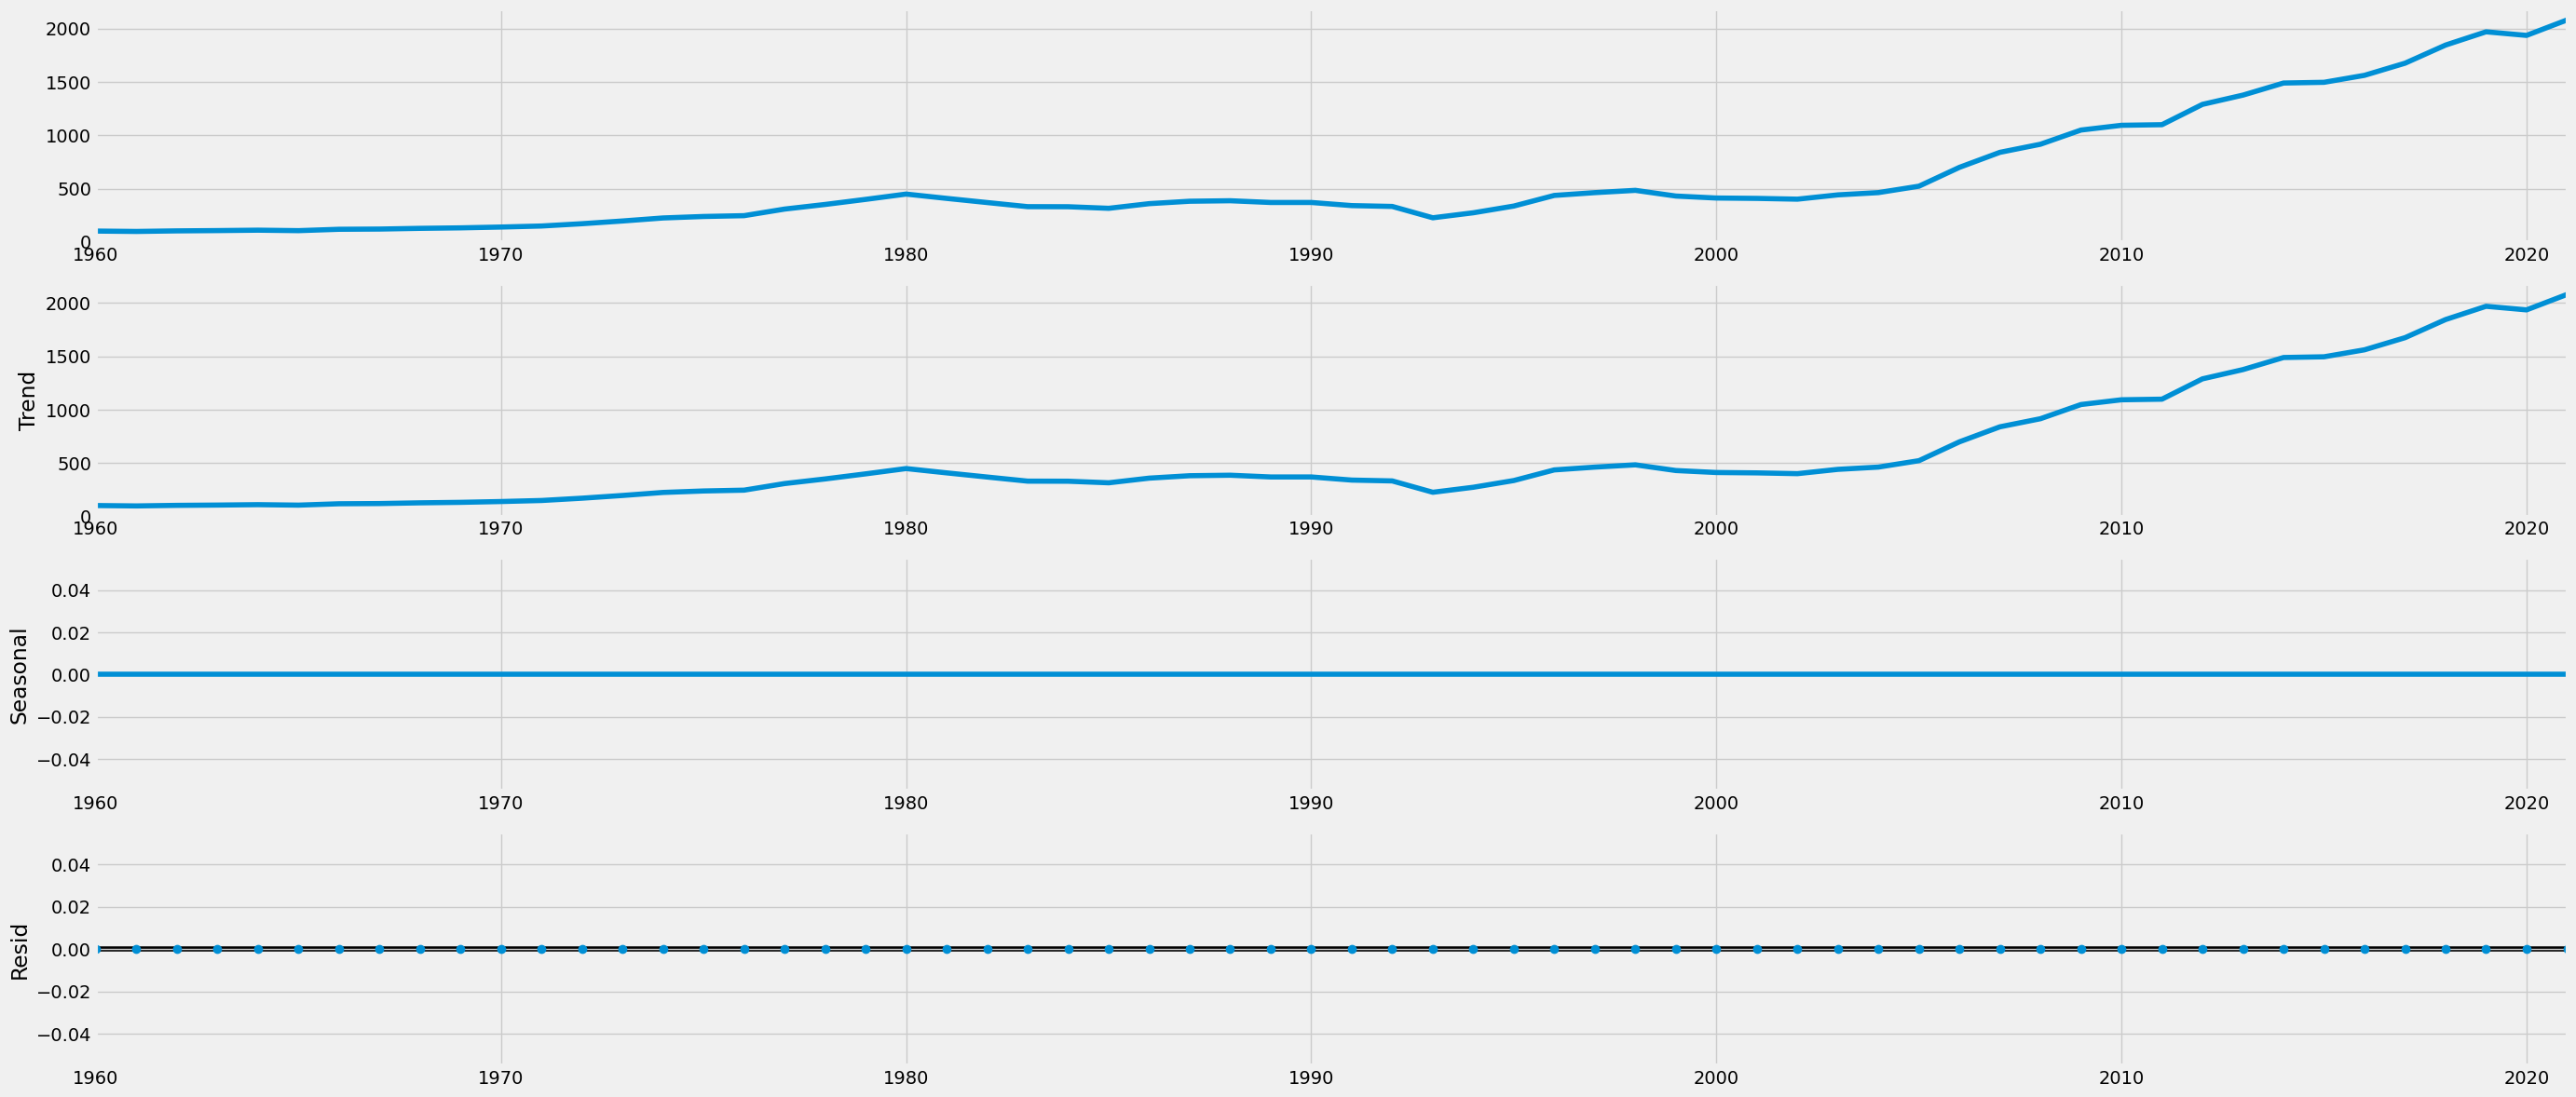

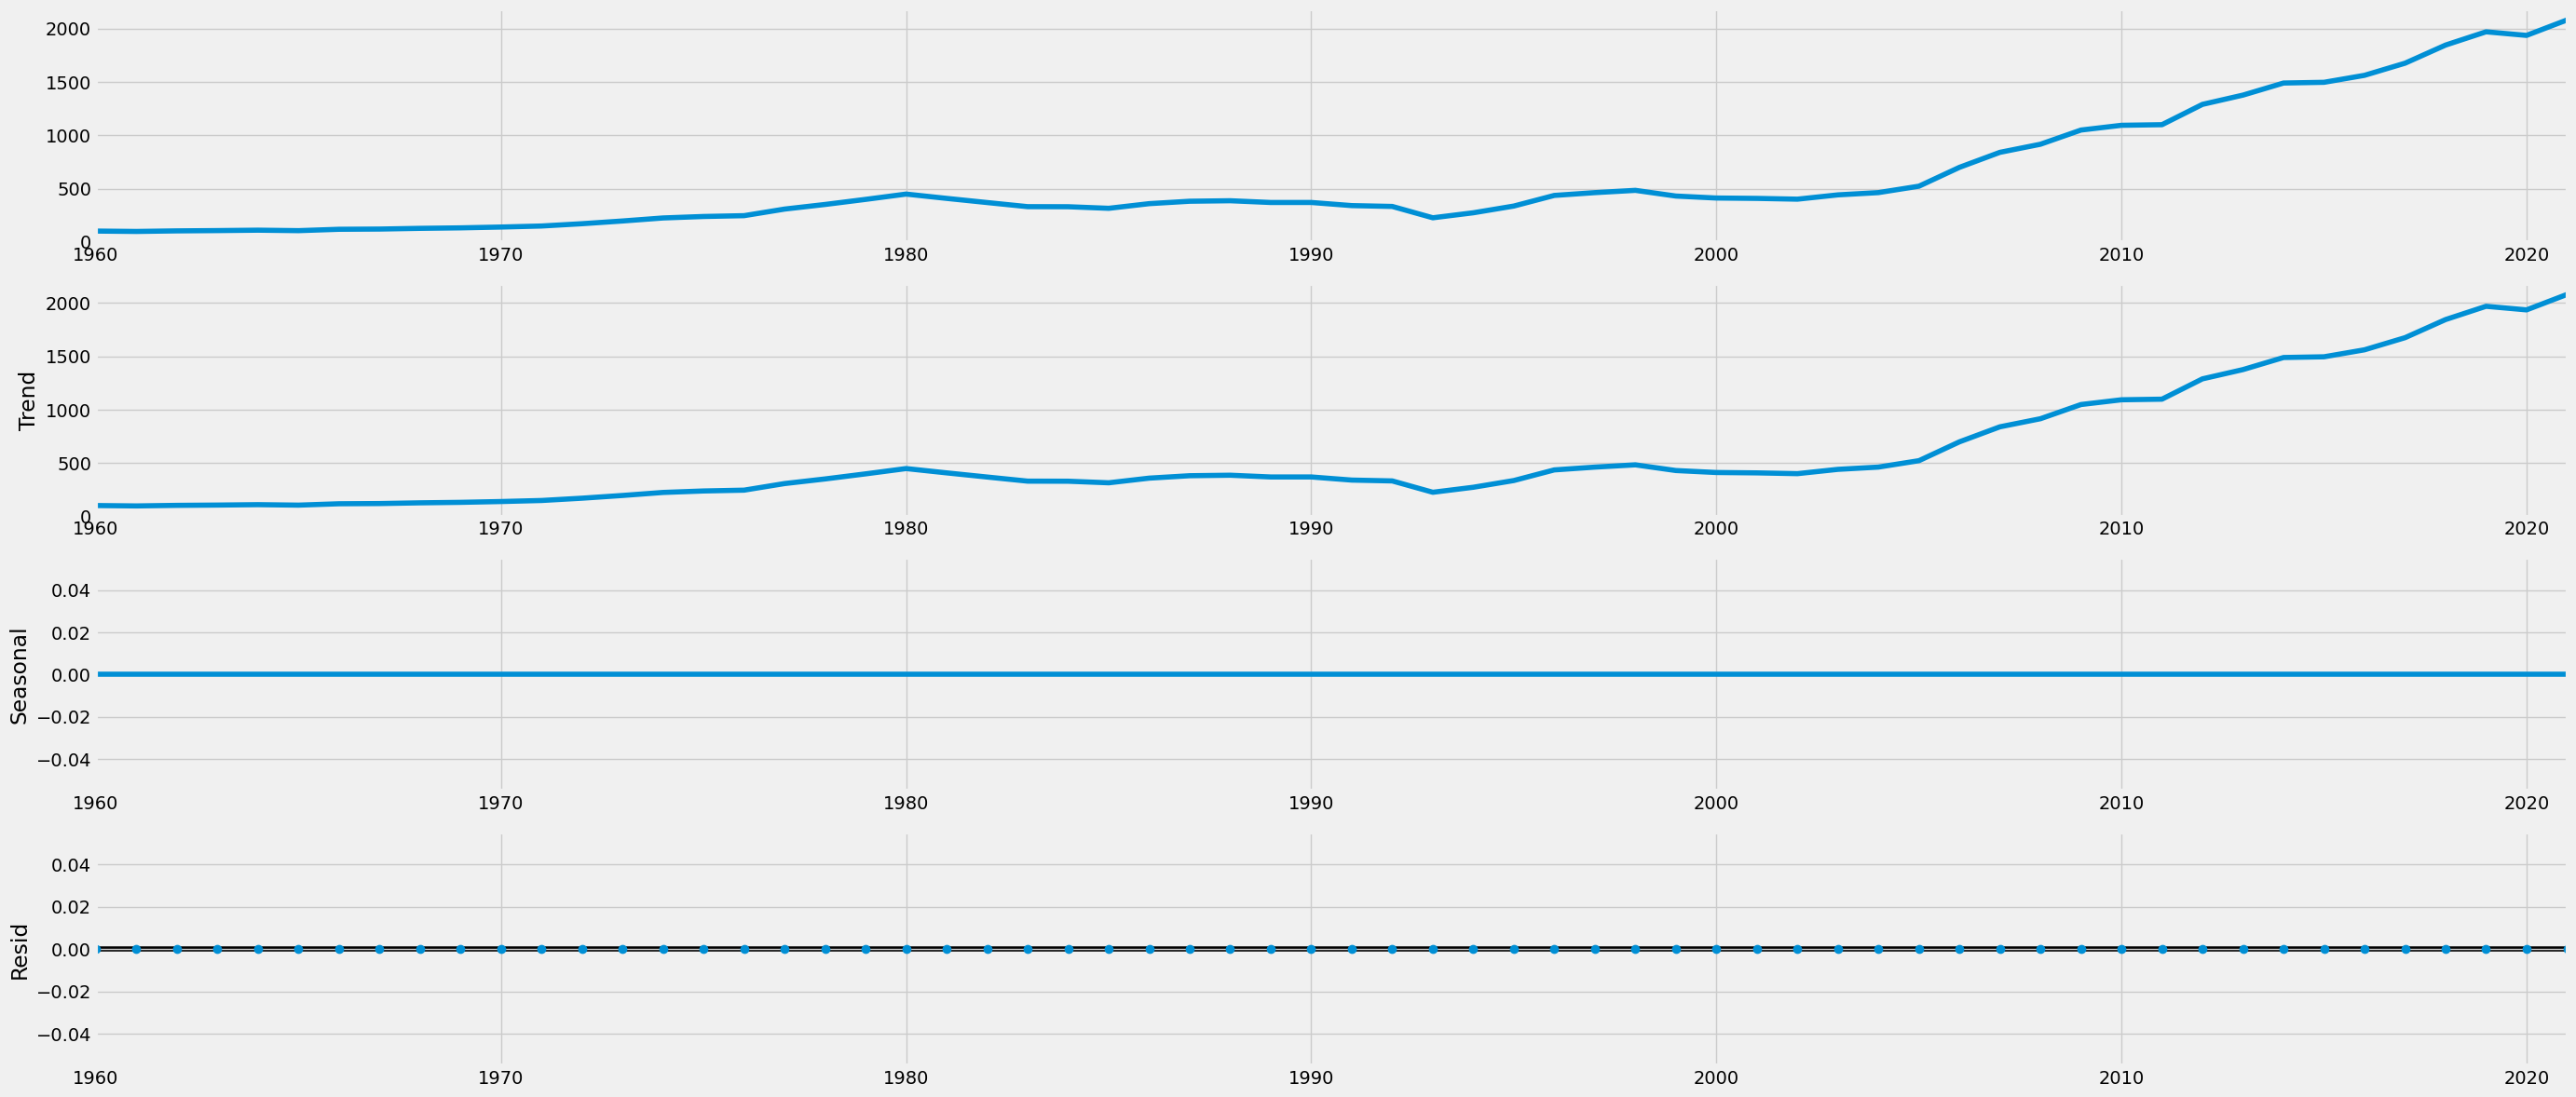

In [79]:
rcParams['figure.figsize'] = 28,12
decomposition.plot()

In [13]:
p=d=q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

In [14]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [17]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [28]:
mod = sm.tsa.statespace.SARIMAX(df, order=pdq[0], seasonal_order = seasonal_pdq[0],  enforce_invertibility=False)
results = mod.fit()
minAIC = results.aic
minHQIC = results.hqic
minBIC = results.bic

best_pdq = None
best_seasonal_pdq = None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df, order=param, seasonal_order = param_seasonal,  enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            print('ARIMA{}x{}12 - BIC:{}'.format(param, param_seasonal, results.bic))
            print('ARIMA{}x{}12 - HQIC:{}'.format(param, param_seasonal, results.hqic))
            if(results.aic < minAIC):
                minAIC = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except Exception as e:
            print(e)
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1005.6932741066379
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - BIC:1007.820408491683
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - HQIC:1006.5284407319283
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:983.3081210921462
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - BIC:987.5623898622364
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - HQIC:984.978454342727
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:770.6847283157036
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - BIC:772.5967513211318
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - HQIC:771.4128375814805
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:760.9378376193858
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - BIC:764.7618836302421
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - HQIC:762.3940561509396
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:970.4785801269448
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - BIC:974.7328488970351
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - HQIC:972.1489133775257
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:973.1038749918906
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - BIC:979.4852781470258
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - HQIC:975.609374867762
ARIM

ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:662.5046977928025
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - BIC:670.9481932494957
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - HQIC:665.813782792228
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:544.9859330551209
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - BIC:550.6613939494528
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - HQIC:547.1391950019502
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:545.7733154013196
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - BIC:553.340596593762
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - HQIC:548.6443313304253
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:661.8651540612998
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - BIC:668.1977756538197
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - HQIC:664.3469678108689
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:658.7298862781482
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - BIC:667.1733817348414
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - HQIC:662.0389712775738
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:544.5407795689059
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - BIC:550.2162404632378
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - HQIC:546.6940415157352
ARIMA(

In [29]:
best_pdq

(1, 1, 0)

In [30]:
best_seasonal_pdq

(0, 1, 0, 12)

In [31]:
mod = sm.tsa.statespace.SARIMAX(df, order=best_pdq, seasonal_order = best_seasonal_pdq,  enforce_invertibility=False)
results = mod.fit()

In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     GDP Per Capita   No. Observations:                   62
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -269.610
Date:                            Thu, 13 Jul 2023   AIC                            543.221
Time:                                    16:09:18   BIC                            547.004
Sample:                                01-01-1960   HQIC                           544.656
                                     - 01-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5105      0.141      3.613      0.000       0.234       0.787
sigma2      3499.8910    590.191      5.930      0.000    2343.138    4656.644
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):                 4.28
Prob(Q):                              0.50   Prob(JB):                         0.12
Heteroskedasticity (H):               6.51   Skew:                             0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

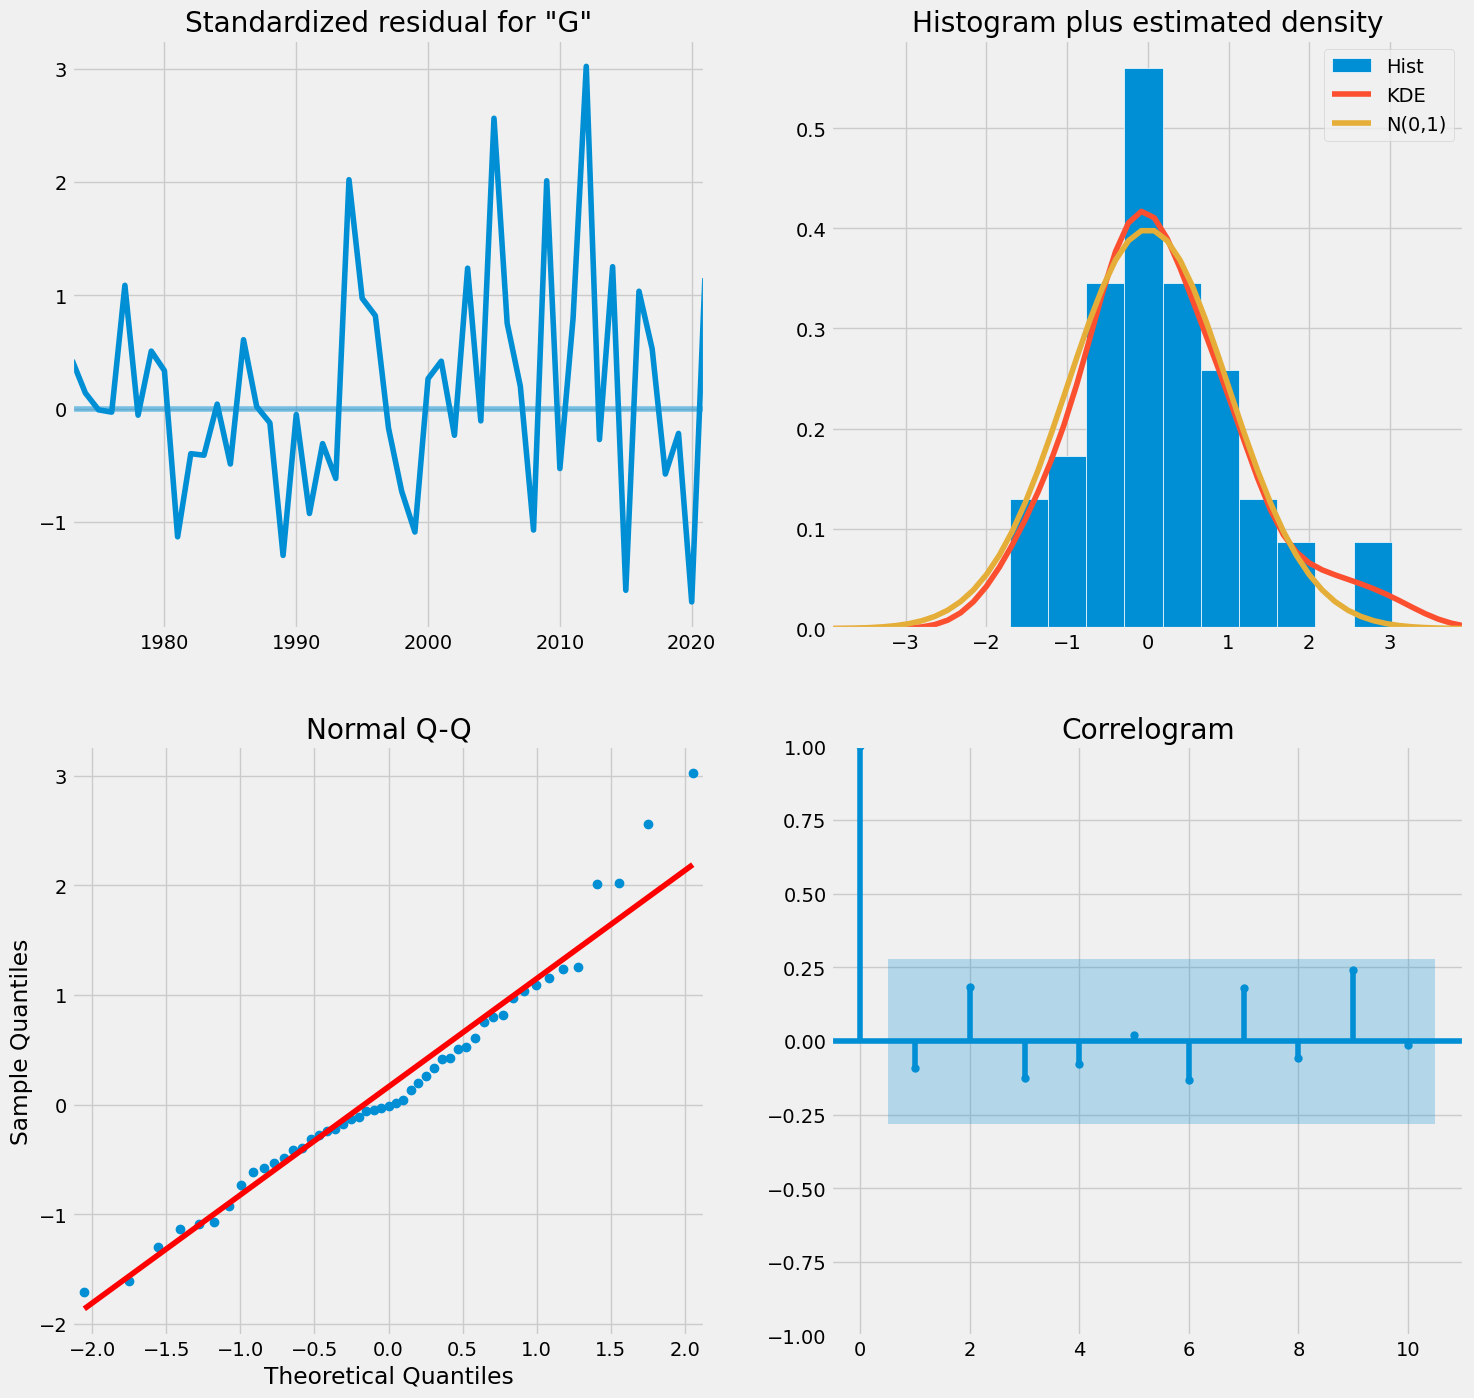

In [34]:
results.plot_diagnostics(figsize=(16,16))
plt.show()

In [40]:
pred = results.get_prediction(start=pd.to_datetime('1960-01-01'), dynamic = False)


In [42]:
pred_df = pred.conf_int()

In [44]:
pred_df['GDP Per Capita'] = df['GDP Per Capita']

<Axes: >

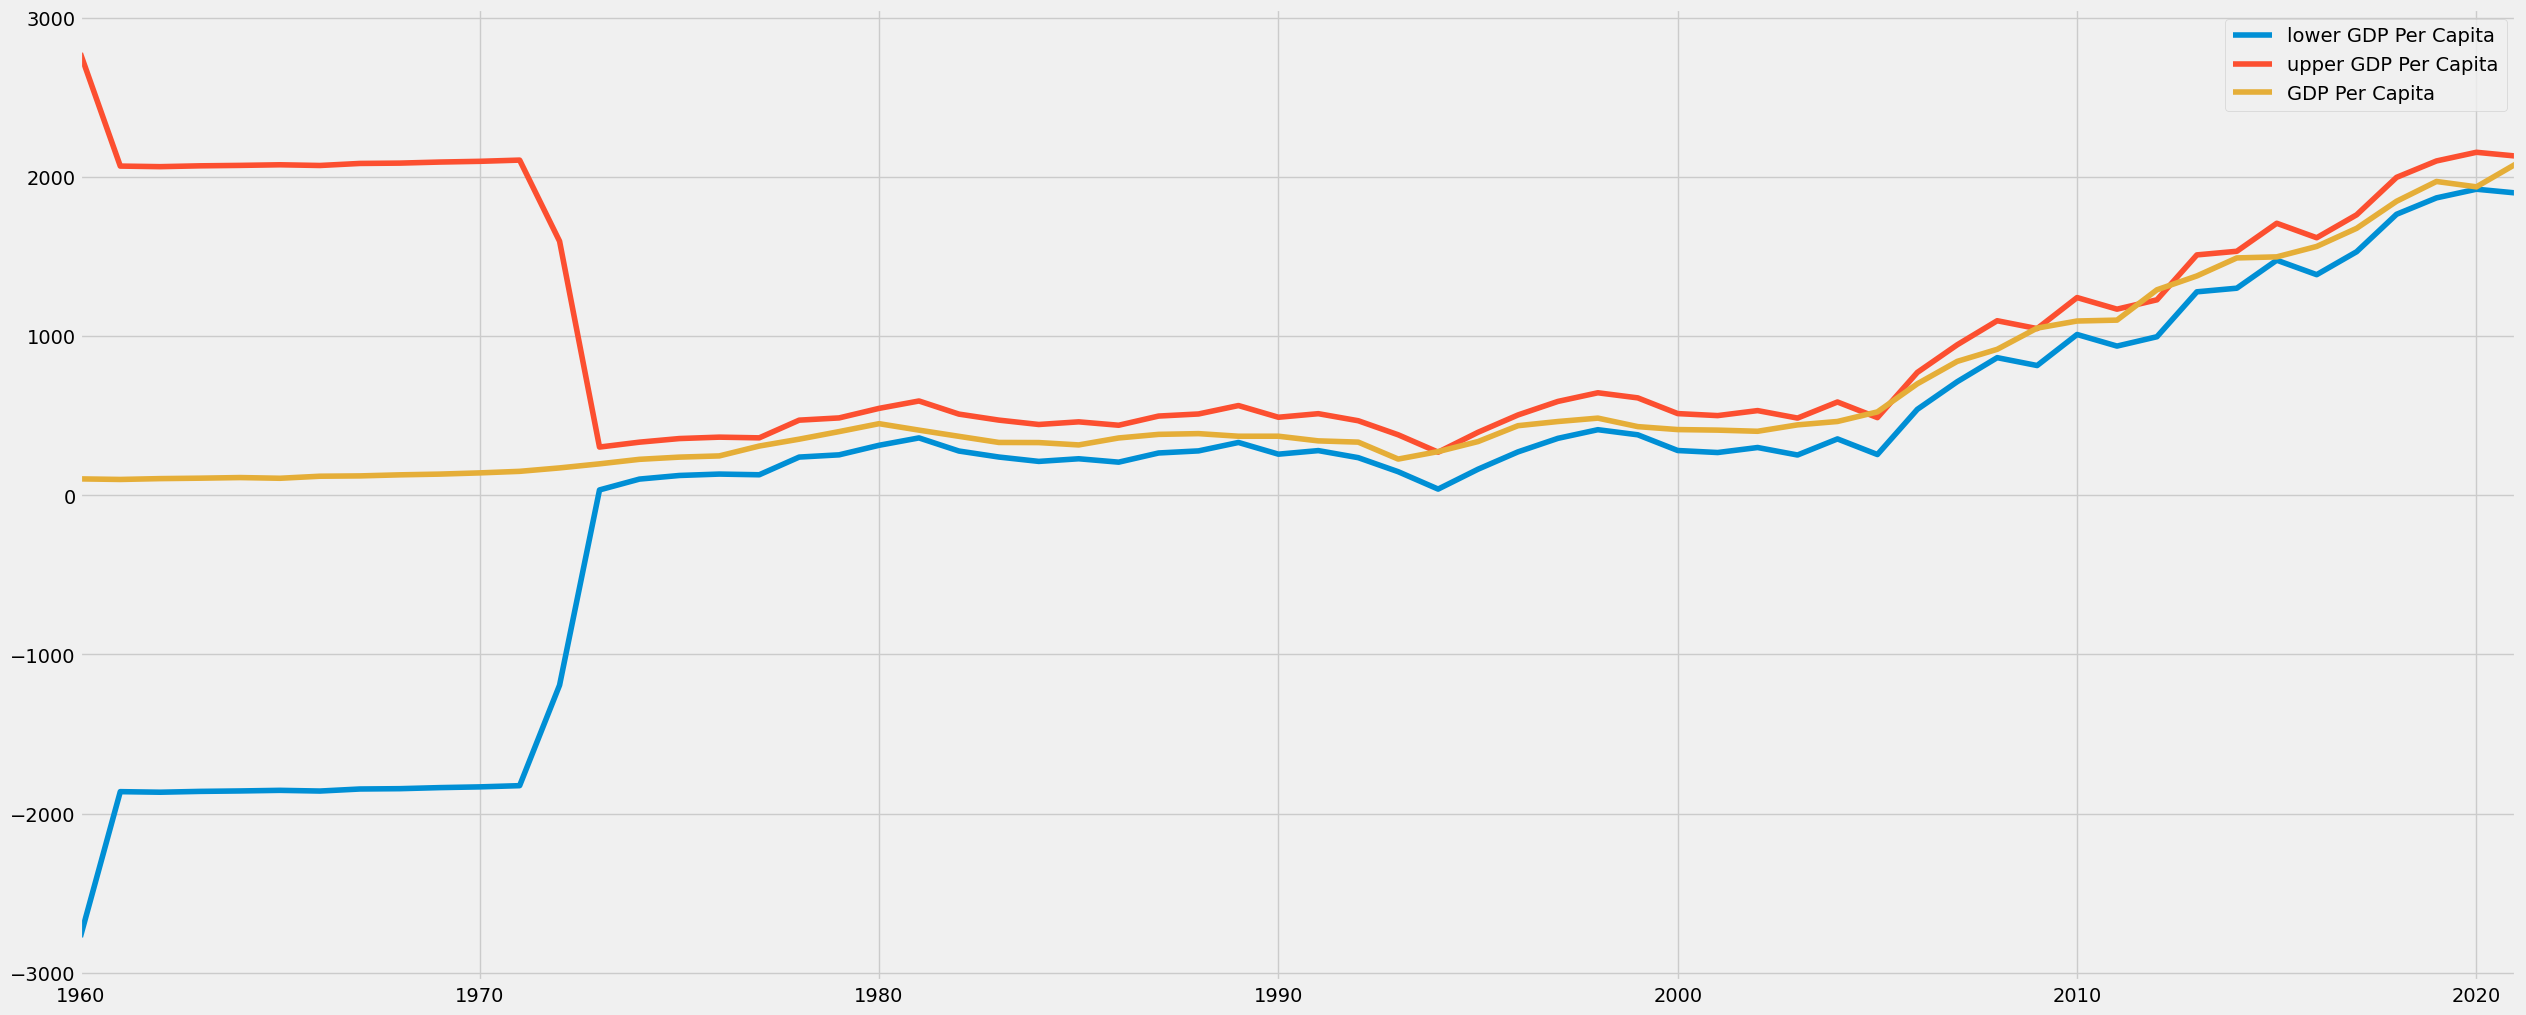

In [46]:
pred_df.plot()

In [49]:
pred_df['Max'] = pred_df['upper GDP Per Capita'] - pred_df['GDP Per Capita'] 
pred_df['Min'] = pred_df['GDP Per Capita'] - pred_df['lower GDP Per Capita'] 

<Axes: >

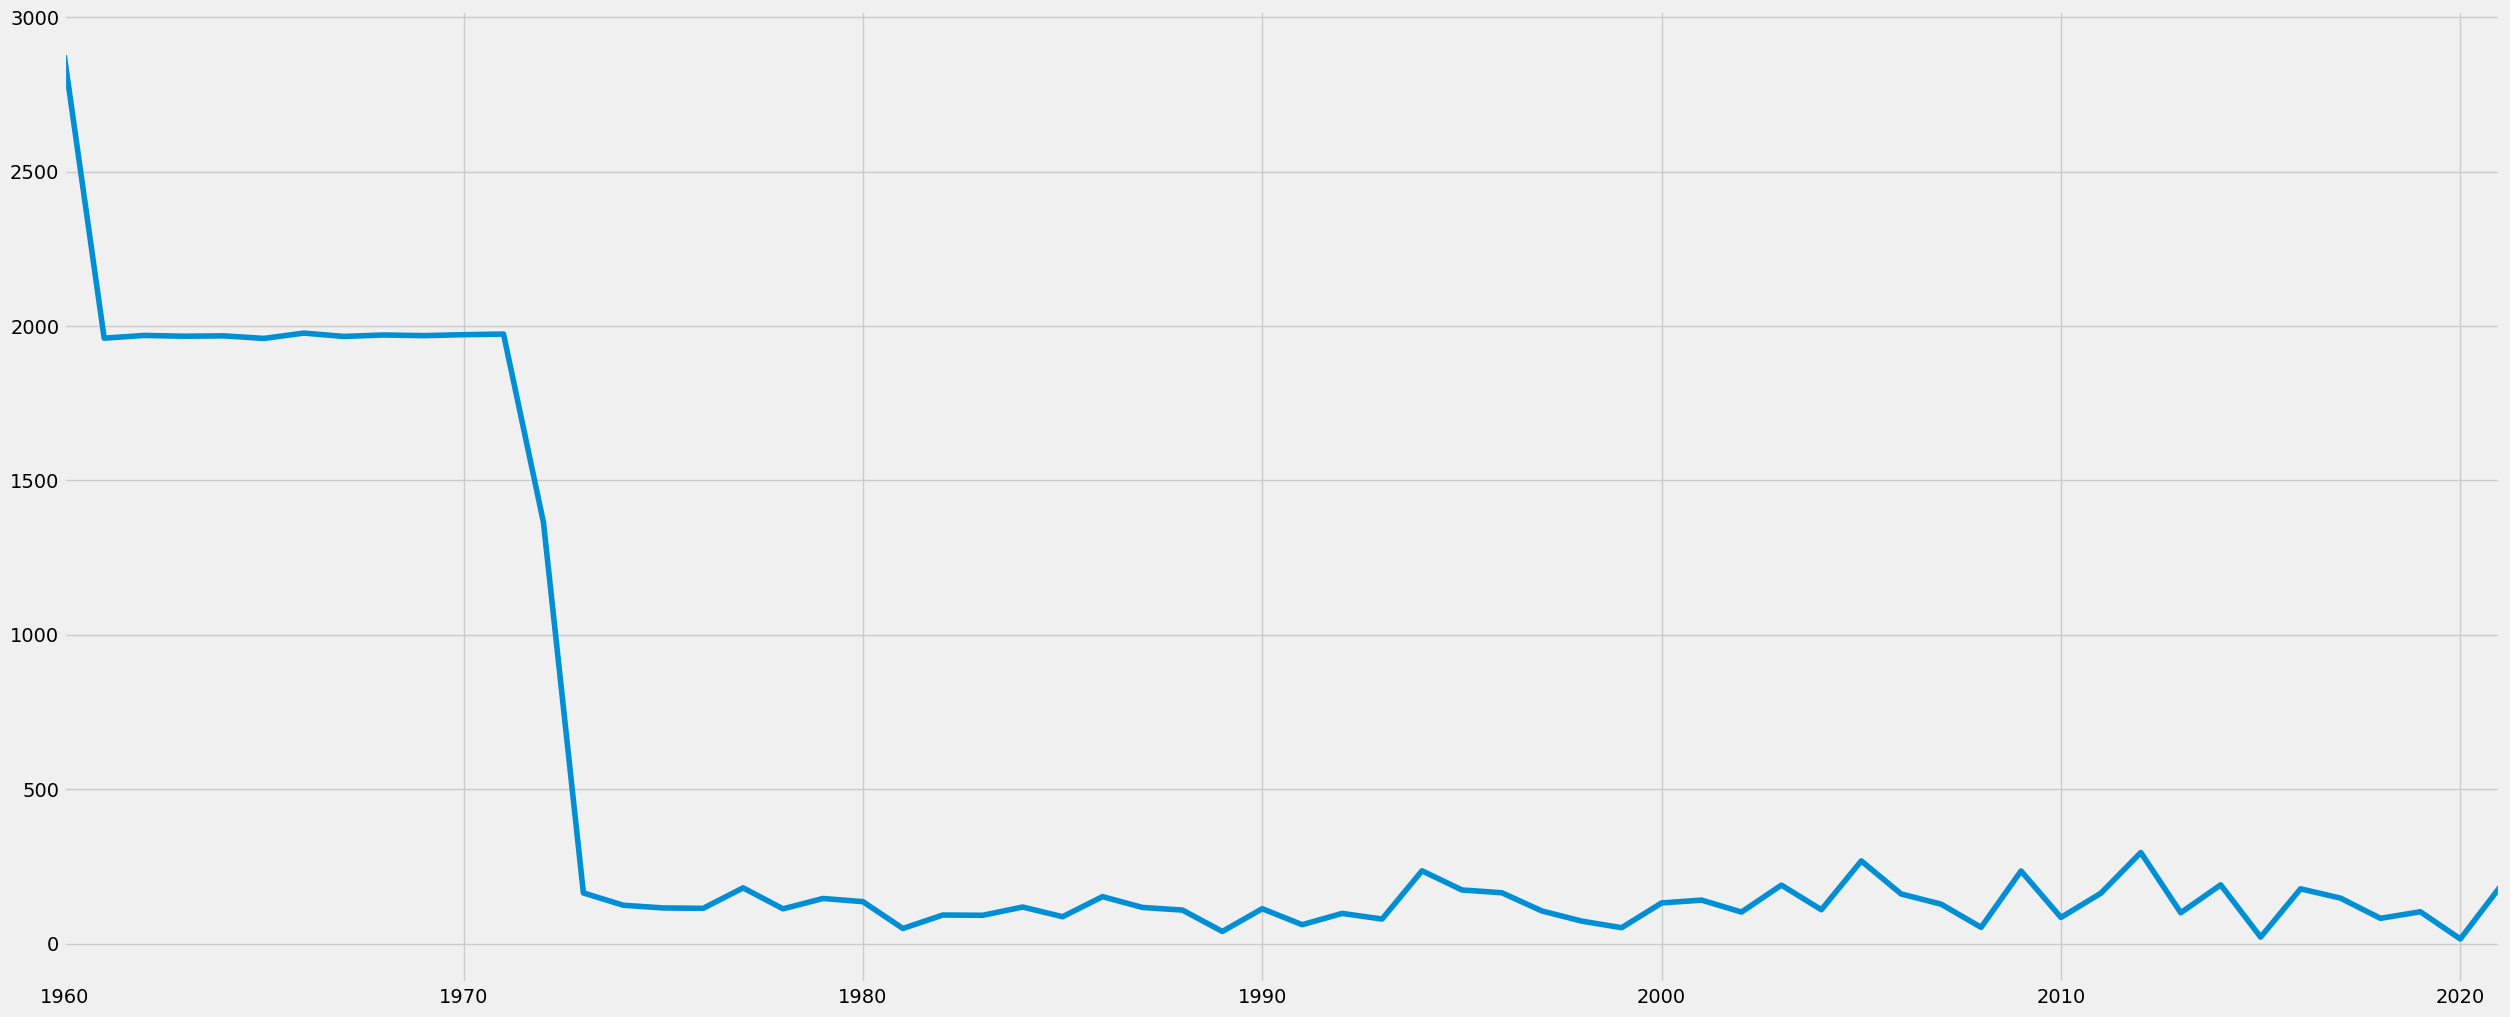

In [52]:
pred_df['Min'].plot()

<Axes: >

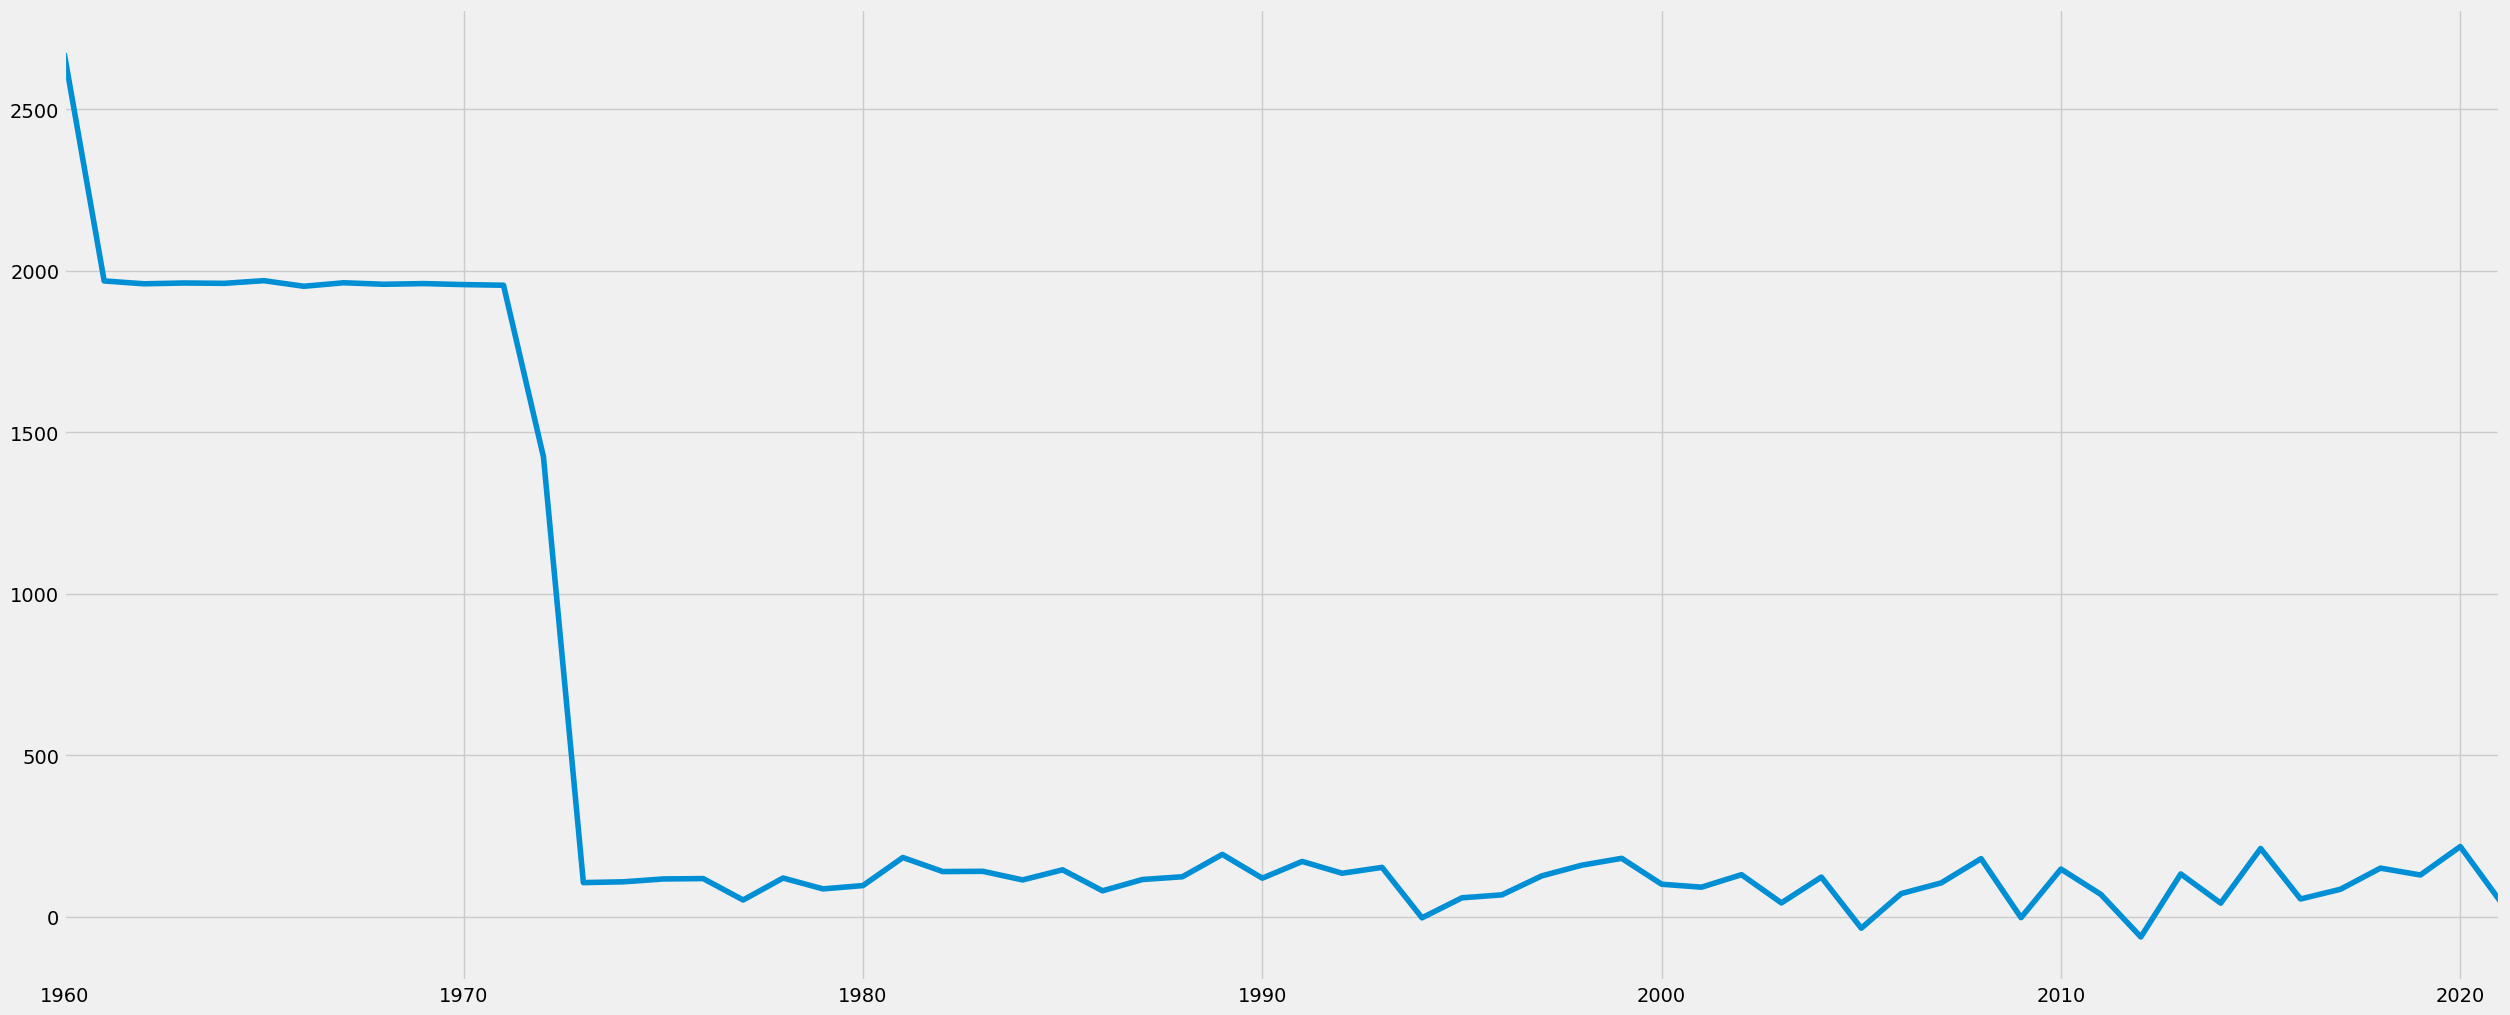

In [53]:
pred_df['Max'].plot()

In [69]:
forecast = results.get_forecast(steps=10)

In [70]:
forecast_df = forecast.conf_int()

In [71]:
forecast_df

,lower GDP Per Capita,upper GDP Per Capita
2022-01-01,2016.620684,2248.523139
2023-01-01,1931.392679,2351.489699
2024-01-01,2039.777845,2627.296214
2025-01-01,2053.935737,2788.898773
2026-01-01,2102.115388,2967.749266
2027-01-01,2050.483765,3033.282135
2028-01-01,2062.829795,3152.004109
2029-01-01,2127.931961,3314.810536
2030-01-01,2252.446471,3529.971782
2031-01-01,2334.374709,3696.717411


In [72]:
forecast_df['Average'] = (forecast_df['upper GDP Per Capita'] + forecast_df['lower GDP Per Capita'])/2 


In [73]:
forecast_df

,lower GDP Per Capita,upper GDP Per Capita,Average
2022-01-01,2016.620684,2248.523139,2132.571911
2023-01-01,1931.392679,2351.489699,2141.441189
2024-01-01,2039.777845,2627.296214,2333.537030
2025-01-01,2053.935737,2788.898773,2421.417255
2026-01-01,2102.115388,2967.749266,2534.932327
2027-01-01,2050.483765,3033.282135,2541.882950
2028-01-01,2062.829795,3152.004109,2607.416952
2029-01-01,2127.931961,3314.810536,2721.371248
2030-01-01,2252.446471,3529.971782,2891.209126
2031-01-01,2334.374709,3696.717411,3015.546060


<Axes: >

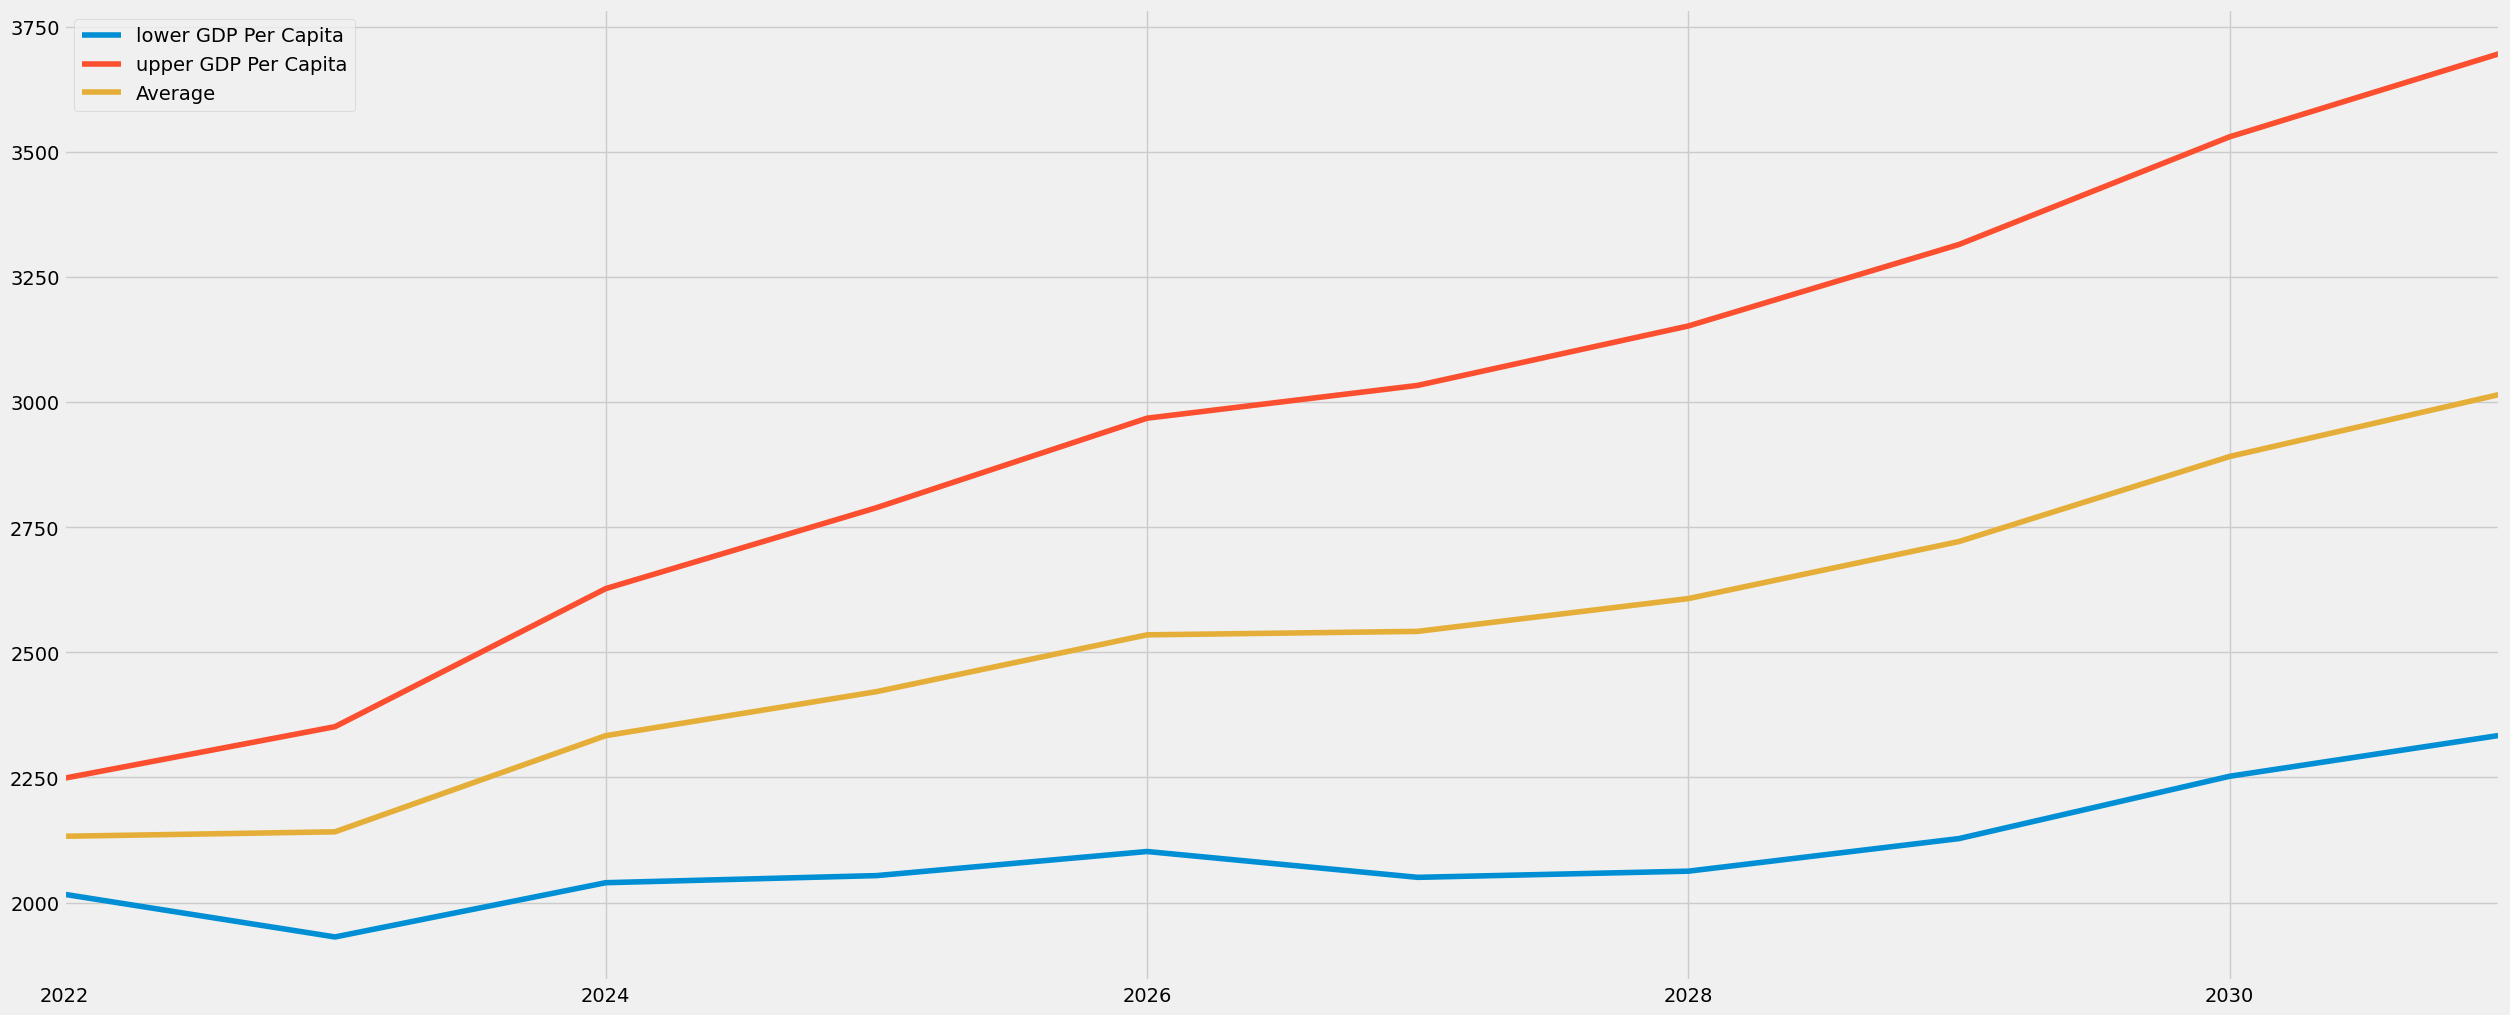

In [74]:
forecast_df.plot()